# Analysing the original nata sales on multiple factors.
by Smahi

## Scope
- Filter out the data for normal natas.
- Use the columns day of the week and week of the day to plot against the sales.
- Find relation between nata sales and COGS.

## Summary
1. Below is the plot for nata sales on different days of the week
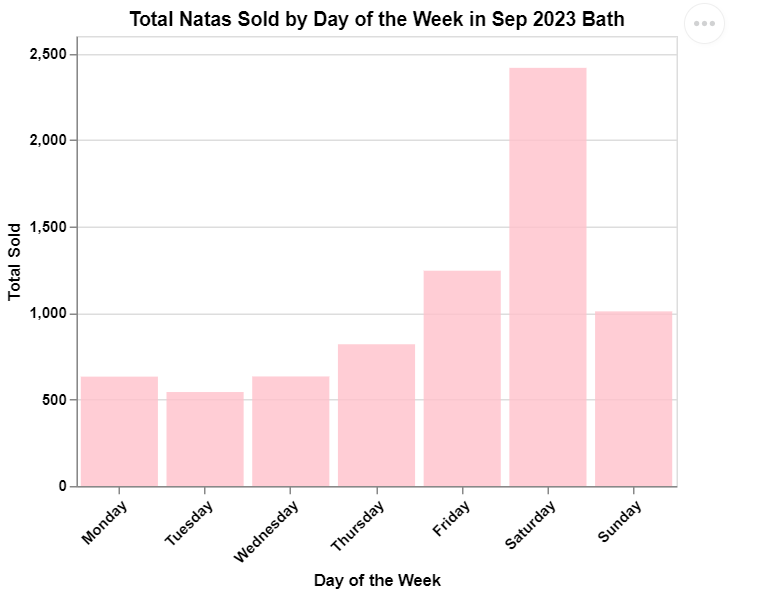


2. The plot below is for sales for each week of September
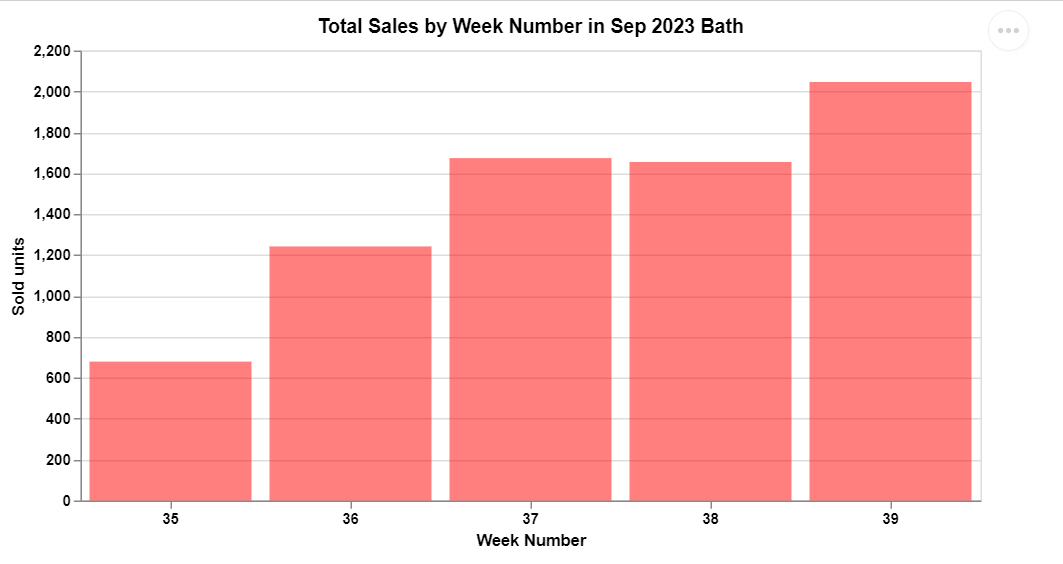


3. The plot between sales and COGS
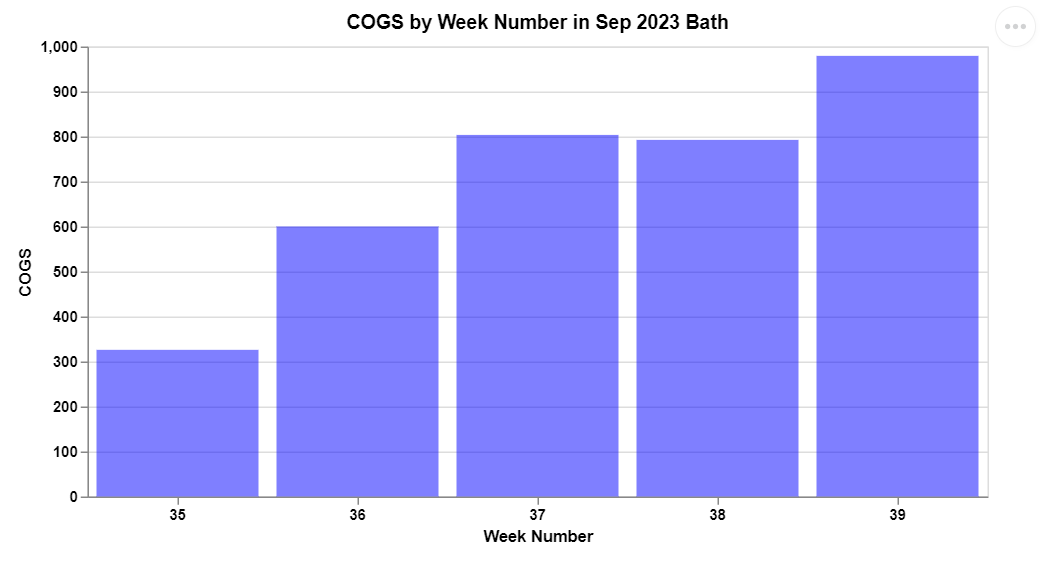



## Import

In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

In [2]:
# Read data
df = pd.read_excel('output.xlsx')

In [3]:
# Preview
df.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
0,2023-09-01,Pasteis de nata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,35
1,2023-09-01,NaN,Pastel de Nata,582.2,457.28,284.0,0.0,,NaN,NaN,-124.92,0.0,40.40,1.61,136.32,320.96,NaN,Friday,35
2,2023-09-01,Total (Pasteis de nata),NaN,582.2,457.28,284.0,0.0,-,NaN,0.0,-124.92,0.0,40.40,1.61,136.32,320.96,NaN,Friday,35
3,2023-09-01,Coffee Deal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,35
4,2023-09-01,NaN,Coffee & Pastel de Nata,196.8,196.80,48.0,0.0,,NaN,NaN,0.00,0.0,17.39,4.10,0.00,196.80,NaN,Friday,35


In [4]:
# Check size
df.shape

(2542, 19)

In [5]:
# Fill Null values
df.fillna('',inplace=True)

In [6]:
# Filter the data where the 'Category' column contains 'Total (Pasteis de nata)'
data = df[df['Category Name'] == 'Total (Pasteis de nata)']

# Now 'filtered_data' contains only the rows where 'Category' is 'Total (Pasteis de nata)'


In [7]:
# Preview
data.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
2,2023-09-01,Total (Pasteis de nata),,582.2,457.28,284.0,0.0,-,,0.0,-124.92,0.0,40.4,1.61,136.32,320.96,,Friday,35
109,2023-09-02,Total (Pasteis de nata),,809.75,676.33,395.0,0.0,-,,0.0,-133.42,0.0,44.81,1.71,189.6,486.73,,Saturday,35
206,2023-09-03,Total (Pasteis de nata),,506.35,434.61,247.0,0.0,-,,0.0,-71.74,0.0,44.0,1.76,118.56,316.05,,Sunday,36
296,2023-09-04,Total (Pasteis de nata),,311.6,278.0,152.0,0.0,-,,0.0,-33.6,0.0,46.98,1.83,72.96,205.04,,Monday,36
368,2023-09-05,Total (Pasteis de nata),,291.1,271.85,142.0,-8.2,-,,0.0,-36.07,0.0,41.55,1.81,72.1,199.75,16.82,Tuesday,36


In [8]:
# Size
data.shape

(30, 19)

In [9]:
# Group the data based on day
week_data = data.groupby(['Day of Week'])['Sold'].sum().reset_index()

In [10]:
# Sort it by sales
week_data = week_data.sort_values(by='Sold', ascending=False)

In [11]:
week_data = week_data.reset_index(drop=True)

In [12]:
print(week_data)

  Day of Week    Sold
0    Saturday  2416.0
1      Friday  1244.0
2      Sunday  1009.0
3    Thursday   819.0
4   Wednesday   633.0
5      Monday   632.0
6     Tuesday   543.0


In [13]:
# Create an Altair chart
chart = alt.Chart(week_data).mark_bar(color='pink',opacity=0.8).encode(
    x=alt.X('Day of Week:O', title='Day of the Week', 
            sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    y=alt.Y('Sold:Q', title='Total Sold', axis = alt.Axis(labelFontWeight='bold')),
    tooltip=['Day of Week:O', 'Sold:Q']
).properties(
    width=400,
    title='Total Natas Sold by Day of the Week in Sep 2023 Bath'
)

In [14]:
chart

alt.Chart(...)

In [15]:
# Group the data on week
week_no = data.groupby(['Week Number'])['Sold'].sum().reset_index()

In [16]:
week_no

,Week Number,Sold
0,35,679.0
1,36,1242.0
2,37,1674.0
3,38,1655.0
4,39,2046.0


In [17]:
# Visualise it
chart = alt.Chart(week_no).mark_bar(color='red',opacity=0.5).encode(
    x=alt.X('Week Number:N', axis=alt.Axis(labelFontWeight='bold',labelAngle=0)),
    y=alt.Y('Sold:Q', title = 'Sold units',axis = alt.Axis(labelFontWeight='bold')),
    tooltip=['Week Number:N', 'Sold:Q']
).properties(
    width=600,
    title='Total Sales by Week Number in Sep 2023 Bath'
)

In [18]:
chart

alt.Chart(...)

In [19]:
# Check for weekly Gross Profit
weekly_profit = data.groupby(['Week Number'])['Gross Profit'].sum().reset_index()

In [20]:
weekly_profit

,Week Number,Gross Profit
0,35,807.69
1,36,1608.39
2,37,2131.95
3,38,2072.35
4,39,2589.10


In [21]:
chart2 = alt.Chart(weekly_profit).mark_bar(color='green',opacity=0.5).encode(
    x=alt.X('Week Number:N', axis=alt.Axis(labelFontWeight='bold',labelAngle=0)),
    y=alt.Y('Gross Profit:Q', title = 'Gross Profit(£}',axis = alt.Axis(labelFontWeight='bold')),
    tooltip=['Week Number:N', 'Gross Profit:Q']
).properties(
    width=600,
    title='Gross Profit by Week Number in Sep 2023 Bath'
)

In [26]:
chart2

alt.Chart(...)

**Units sold and profit follow the same trend**

In [22]:
# Check for weekly spent on COGS
weekly_cogs = data.groupby(['Week Number'])['COGS'].sum().reset_index()

In [23]:
weekly_cogs

,Week Number,COGS
0,35,325.92
1,36,600.10
2,37,803.52
3,38,792.48
4,39,979.20


In [24]:
chart3 = alt.Chart(weekly_cogs).mark_bar(color='blue',opacity=0.5).encode(
    x=alt.X('Week Number:N', axis=alt.Axis(labelFontWeight='bold',labelAngle=0)),
    y=alt.Y('COGS:Q', title = 'COGS',axis = alt.Axis(labelFontWeight='bold')),
    tooltip=['Week Number:N', 'COGS:Q']
).properties(
    width=600,
    title='COGS by Week Number in Sep 2023 Bath'
)

In [25]:
chart3

alt.Chart(...)